**1일차 Classification**
==========================================================================






1. cifar10으로 이미지 직접 불러와서 사용하기
==========================================================================




https://github.com/YoongiKim/CIFAR-10-images
로컬 컴퓨터에 다운받기


In [ ]:
#구글 드라이브와 Colab 연동

from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

DIR = '/content/gdrive/MyDrive/pytorch/'

defaultDIR = DIR + 'chapter3/' ###########################

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
            print('Make forlder ' +  directory)
    except OSError:
        print('Error: Creating directory. ' +  directory)
 



In [ ]:
dataDIR = defaultDIR+'data/'
modelDIR = defaultDIR+'models/'

In [ ]:

#createFolder(dataDIR) # 이미 데이터 폴더 있어서 주석처리함
createFolder(modelDIR)


Make forlder /content/gdrive/MyDrive/pytorch/chapter3/models/


다운받은 파일을 업로드를 활용해 구글 드라이브에 업로드 해보기

In [ ]:
# 이 방법으로 업로드 할 경우 코랩이 제공하는 메모리 공간에 저장되게 됨
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

Saving CIFAR-10-images-master.zip to CIFAR-10-images-master.zip
User uploaded file "CIFAR-10-images-master.zip" with length 55828686 bytes


In [ ]:
# 코랩 실행 위치에 있는걸 확인 할 수 있음
#!ls #지금은 바로 구글드라이브 개인 폴더에 넣었으므로 주석처리

adc.json  gdrive  sample_data


In [ ]:
import shutil #파일 복사, 이동 등에 쓰이는 라이브러리
filename = 'CIFAR-10-images-master.zip' 
src = '/content/' 

In [ ]:
#shutil.move(src + filename, dataDIR + filename) #파일 이동(개인 구글드라이브위치) 움직일 필요가 없어서 주석처리

'/content/gdrive/MyDrive/pytorch/chapter2/data/CIFAR-10-images-master.zip'

In [ ]:
#내 드라이브 경로 '/content/gdrive/MyDrive/pytorch/chapter3/data' 안에 있는 파일 확인 (ls -a)
!cd /content/gdrive/MyDrive/pytorch/chapter3/data; ls -a;


CIFAR-10-images-master.zip


In [ ]:
import zipfile #압축 관련 라이브러리
    	
cifar_zip = zipfile.ZipFile(dataDIR + filename)
cifar_zip.extractall(dataDIR) #시간오래걸림, 약 10분 정도 
cifar_zip.close()

In [ ]:
#내 드라이브 경로 '/content/gdrive/MyDrive/pytorch/data' 안에 있는 파일 확인 (ls -a)
!cd /content/gdrive/MyDrive/pytorch/chapter3/data; ls -a; #압축폴더 잘 풀린걸 확인 가능


CIFAR-10-images-master	CIFAR-10-images-master.zip


In [ ]:
foldername = 'CIFAR-10-images' 

In [ ]:
os.rename(dataDIR + filename.split('.')[0], dataDIR + foldername) #폴더 이름 변경

In [ ]:
#내 드라이브 경로 '/content/gdrive/MyDrive/pytorch/data' 안에 있는 파일 확인 (ls -a)
!cd /content/gdrive/MyDrive/pytorch/chapter3/data; ls -a;


CIFAR-10-images  CIFAR-10-images-master.zip


In [ ]:
import torch
import torchvision
import torchtext
print(torch.__version__)

1.10.0+cu111


In [ ]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.optim as optim

import numpy as np

from PIL import Image
from glob import glob


In [ ]:
for root, dirs, files in os.walk(dataDIR): #데이터, 폴더 구조의 경로 확인하는 방법 자주 사용됨 <- 어떻게 데이터를 가지고올까 하는 고민!
    print(root)

/content/gdrive/MyDrive/pytorch/chapter3/data/
/content/gdrive/MyDrive/pytorch/chapter3/data/CIFAR-10-images
/content/gdrive/MyDrive/pytorch/chapter3/data/CIFAR-10-images/test
/content/gdrive/MyDrive/pytorch/chapter3/data/CIFAR-10-images/test/airplane
/content/gdrive/MyDrive/pytorch/chapter3/data/CIFAR-10-images/test/automobile
/content/gdrive/MyDrive/pytorch/chapter3/data/CIFAR-10-images/test/bird
/content/gdrive/MyDrive/pytorch/chapter3/data/CIFAR-10-images/test/cat
/content/gdrive/MyDrive/pytorch/chapter3/data/CIFAR-10-images/test/deer
/content/gdrive/MyDrive/pytorch/chapter3/data/CIFAR-10-images/test/dog
/content/gdrive/MyDrive/pytorch/chapter3/data/CIFAR-10-images/test/frog
/content/gdrive/MyDrive/pytorch/chapter3/data/CIFAR-10-images/test/horse
/content/gdrive/MyDrive/pytorch/chapter3/data/CIFAR-10-images/test/ship
/content/gdrive/MyDrive/pytorch/chapter3/data/CIFAR-10-images/test/truck
/content/gdrive/MyDrive/pytorch/chapter3/data/CIFAR-10-images/train
/content/gdrive/MyDrive/py

In [ ]:
#트레이닝데이터, 테스트데이터가 분리되어있으면 처음부터 별도로 가지고 오면 됨
#분리되지 않았다면 전부다 불러와서 8:2로 나눠야 하는 작업 필요 

trainDIR = dataDIR + 'CIFAR-10-images/train/'
testDIR = dataDIR + 'CIFAR-10-images/test/'

In [ ]:
img_files = glob(os.path.abspath(os.path.join(trainDIR, '*/*.jpg')))   #glob : 어떠한 경로에 있는 전체 파일 가져오기 
print(len(img_files))
data = img_files[0]
print(data)
labelName = data.split('/')[-2]
print(labelName)

50000
/content/gdrive/MyDrive/pytorch/chapter3/data/CIFAR-10-images/train/airplane/0000.jpg
airplane


https://github.com/sonic1sonic/PyTorch-CIFAR10

https://github.com/utkuozbulak/pytorch-custom-dataset-examples

Database를 직접 불러와서 사용하기 
-------------------------------------------


In [ ]:
def getLabelValue(label): #레이블별로 list를 만들수도 있지만 함수를 만들어서 코드로 제어도 할 수 있음
    if label == "airplane":
        return torch.LongTensor(np.array([0], dtype=np.int64))
    elif label == "automobile":
        return torch.LongTensor(np.array([1], dtype=np.int64))
    elif label == "bird":
        return torch.LongTensor(np.array([2], dtype=np.int64))
    elif label == "cat":
        return torch.LongTensor(np.array([3], dtype=np.int64))
    elif label == "deer":
        return torch.LongTensor(np.array([4], dtype=np.int64))
    elif label == "dog":
        return torch.LongTensor(np.array([5], dtype=np.int64))
    elif label == "frog":
        return torch.LongTensor(np.array([6], dtype=np.int64))
    elif label == "horse":
        return torch.LongTensor(np.array([7], dtype=np.int64))
    elif label == "ship":
        return torch.LongTensor(np.array([8], dtype=np.int64))
    elif label == "truck":
        return torch.LongTensor(np.array([9], dtype=np.int64))

In [ ]:
#중요한부분, 파이토치는 데이터 로딩도 클래스 구조로 함! 
#초기화메서드, 겟아이템메서드는 때에따라 필요에따라 모양에따라 바뀔 수 있음

class CifarDataset:  
    def __init__(self, img_path, imsize=32, transform=None):
        self.img_path = img_path
        # obtain image filename and label list
        self.filenames = []
        self.labels = []
        img_files = glob(os.path.abspath(os.path.join(img_path, '*/*.jpg')))   
        print(len(img_files))
        for data in img_files:
            self.filenames.append(data)
            labelName = data.split('/')[-2]
            self.labels.append(labelName)
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(os.path.join(self.img_path, self.filenames[index]))
        img = img.convert("RGB")
        img = img.resize((224, 224), Image.BILINEAR)
        if self.transform is not None:
            img = self.transform(img)
        label = getLabelValue(self.labels[index])
        return img, label

    def __len__(self):
        return len(self.labels)

In [ ]:
from torch.utils.data import DataLoader

#데이터로더 구조를 그대로 쓸거지만, 나만의 클래스 이름을 갖고싶은 경우 아래와 같이 만듦
# 위의 데이터 로딩구조를 그대로 따랐다면 데이터로더의 클래스 구조를 그대로 사용할 수 있음

class CifarDataloader(DataLoader):

    def __init__(self, *args, **kwargs):
        super(CifarDataloader, self).__init__(*args, **kwargs)

ResNet 사용하기
-------------------------------------------

model_zoo에서 ResNet의 Pretrained model 불러와서 사용하기

In [ ]:
import math
import torch.utils.model_zoo as model_zoo
from torch.nn.parameter import Parameter

__all__ = ['ResNet', 'resnet18', 'resnet34', 'resnet50', 'resnet101',
           'resnet152']


model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
}


# 반복되는 구조는 메서드로 만들기 (Conv3*3)

In [ ]:
#반복되는 구조는 함수로 만들어놓음
def conv3x3(in_planes, out_planes, stride=1):
    "3x3 convolution with padding"
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


# Basic Block 구조 (ResNet 18, 34)



In [ ]:
class BasicBlock(nn.Module): #resnet의 블록구조 
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):  #필요한 기능들을 초기화 하는 작업 (모델구조가 아님)
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x) #앞선 레이어랑 크기가 다르면 줄여서 붙여야 함

        out += residual
        out = self.relu(out)

        return out

#Bottleneck 구조 (ResNet 50 이상)

In [ ]:
class Bottleneck(nn.Module): #보틀넥 구조 
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False) #kernel_size가 1인 것이 보틀넥의 중요한 부분
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride,
                               padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * 4, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * 4)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x) #앞선 레이어랑 크기가 다르면 줄여서 붙여야 함

        out += residual
        out = self.relu(out)

        return out


# 실제 ResNet 구조

In [ ]:
# 논문의 모델과, 해당 코드 분석 시 
# 1) 모델의 아키텍쳐 그림을 미리 그려놓고 같이 보면서 분석
# 2) 학습과정에서 사용되는 변수들은 어떤 숫자가 들어갈지 미리 고정해서 분석

class ResNet(nn.Module): #실제 ResNet 구조, 원래 클래스 개수는 1000개로(ImageNet)

    def __init__(self, block, layers, num_classes=1000):
        self.inplanes = 64
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True) ## inplace 하면 input으로 들어온 것 자체를 수정(복제없이 바로 덮어쓰기)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        #ResNet18 1번레이어일때 
        # layers = [2, 2, 2, 2]
        self.layer1 = self._make_layer(block, 64, layers[0]) #_make_layer 메서드 참고
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AvgPool2d(7)
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        #self가 가지고 있는 모듈 모두 중 하나하나씩 초기화 해주기
        for m in self.modules(): 
            if isinstance(m, nn.Conv2d): #isinstance(a,b) a가 b인지 확인
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        #ResNet18 1번레이어일때 
        #파라미터 (stride=1, inplanes = 64, plane=64, block.expansion=1)
        #즉, 아래의 if문 구절에 해당되지 않음 따라서 downsample은 None
        #ResNet18 2번레이어일때는 특징맵을 줄여서 만들어야 하므로
        #downsample이 만들어짐(각 파라미터 => 2, 64, 128, 1)
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        # 빈 레이어 리스트 안에 block 객체 생성해서 append
        layers.append(block(self.inplanes, planes, stride, downsample))

        #ResNet18 1번레이어일때 
        #self.inplanes가 64로 변경 (ResNet 50이상은 달라짐)
        self.inplanes = planes * block.expansion
        #block은 모델 구조 layers로 부터 가지고옴. 여기서는 2
        #range(1,2) => i는 1까지 
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        #총 append 되는 개수 -> 2개     

        return nn.Sequential(*layers)

    def forward(self, x): #실제 ResNet 모델 구조
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1) #뷰(View) - 원소의 수를 유지하면서 텐서의 크기 변경, 넘파이에서의 리쉐이프(Reshape)와 같은 역할
        x = self.fc(x)

        return x

    # homemade pre-trained model loading function :)
    def load_pretrained_model(self, pretrained_state_dict): #사전학습모델 불러오기

        custom_state_dict = self.state_dict()

        for name, param in pretrained_state_dict.items(): #사전학습모델 아이템 중, 이름과 파라미터 불러오기

            if name not in custom_state_dict:
                raise KeyError("unexpected key '{}' in state_dict".format(name))

            if isinstance(param, Parameter):  #isinstance(a,b) a가 b인지 확인
                param = param.data

            try:
                custom_state_dict[name].copy_(param)
            except:
                print("skip loading key '{}' due to inconsistent size".format(name))

        self.load_state_dict(custom_state_dict)



#사용할 모델 구조 함수 설정

In [ ]:

#모델 구조에 관련된 메서드
#사전학습 url 관리 

#**kwargs : keyword argument, 불특정 (인자=인자값)을 받아올 수 있음
def resnet18(pretrained=False, **kwargs): #논문이랑 비교해보면 같은 형태로 구성
    """Constructs a ResNet-18 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(BasicBlock, [2, 2, 2, 2], **kwargs)
    if pretrained:
        model.load_pretrained_model(model_zoo.load_url(model_urls['resnet18']))
    return model


def resnet34(pretrained=False, **kwargs):
    """Constructs a ResNet-34 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(BasicBlock, [3, 4, 6, 3], **kwargs)
    if pretrained:
        model.load_pretrained_model(model_zoo.load_url(model_urls['resnet34']))
    return model


def resnet50(pretrained=False, **kwargs):
    """Constructs a ResNet-50 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(Bottleneck, [3, 4, 6, 3], **kwargs)
    if pretrained:
        model.load_pretrained_model(model_zoo.load_url(model_urls['resnet50']))
    return model


def resnet101(pretrained=False, **kwargs):
    """Constructs a ResNet-101 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(Bottleneck, [3, 4, 23, 3], **kwargs)
    if pretrained:
        model.load_pretrained_model(model_zoo.load_url(model_urls['resnet101']))
    return model


def resnet152(pretrained=False, **kwargs):
    """Constructs a ResNet-152 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(Bottleneck, [3, 8, 36, 3], **kwargs)
    if pretrained:
        model.load_pretrained_model(model_zoo.load_url(model_urls['resnet152']))
    return model

# 학습, 테스트를 위한 메서드

In [ ]:
import time
from torch.autograd import Variable

MSG_DISPLAY_FREQ = 200


def train(train_loader, model, criterion, optimizer, epoch, USE_GPU=False):

    batch_time = 0.0

    # switch to train mode
    model.train()

    end = time.time()

    running_loss = 0.0

    for i, (inputs, labels) in enumerate(train_loader):

        labels = torch.squeeze(labels, 1)

        if USE_GPU:
            inputs, labels = Variable(inputs).cuda(), Variable(labels).cuda()
        else:
            inputs, labels = Variable(inputs), Variable(labels)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.data

        batch_time += time.time()-end
        end = time.time()

        if i % MSG_DISPLAY_FREQ == (MSG_DISPLAY_FREQ-1):
            print("[{}][{}/{}]\t Loss: {:0.5f}\t Batch time: {:0.3f}s".format(epoch, i+1, len(train_loader), running_loss/MSG_DISPLAY_FREQ, batch_time/MSG_DISPLAY_FREQ))
            running_loss = 0.0

In [ ]:
CLASS_NAMES = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def test(test_loader, model, USE_GPU):

    # switch to evaluate mode
    model.eval()

    class_correct = [0] * 10 #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    class_total = [0] * 10 #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    classAccuracy = []
    predictResult = []
    realResult = []

    for i, (inputs, labels) in enumerate(test_loader):

        labels = torch.squeeze(labels, 1)

        if USE_GPU:
            inputs, labels = Variable(inputs, volatile=True).cuda(), Variable(labels, volatile=True).cuda()
        else:
            inputs, labels = Variable(inputs, volatile=True), Variable(labels, volatile=True)

        outputs = model(inputs)

        _, predicted = torch.max(outputs, 1)

        for j in range(predicted.data.size()[0]):

            predict = predicted.data[j] #예측값 
            predictResult.append(predict) #confusion matrix위해서 미리저장
            label = labels.data[j] #실제값
            realResult.append(label) #confusion matrix위해서 미리저장
            if predict == label:
                class_correct[label] += 1 #맞는 결과이면 해당 인덱스 값이 증가

            class_total[label] += 1 #클래스별 개수 확인

    for idx, clss_name in enumerate(CLASS_NAMES):
        print("Accuracy of {}: {:0.3}".format(clss_name, class_correct[idx]/class_total[idx]))
        classAccuracy.append(class_correct[idx]/class_total[idx])
    
    return classAccuracy, predictResult, realResult

In [ ]:
def save_checkpoint(state, output_dir):
    if not os.path.exists(os.path.join(output_dir)):
        os.makedirs(os.path.join(output_dir))
    filepath = os.path.join(output_dir, 'epoch_{:03}.pth.tar'.format(state['epoch']))
    torch.save(state, filepath)
    shutil.copyfile(filepath, os.path.join(output_dir, 'last_checkpoint.pth.tar'))

def load_checkpoint(checkpoint_path, model, optimizer):
    print("=> loading checkpoint '{}'".format(checkpoint_path))
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    print("=> loaded checkpoint '{}' (epoch {})".format(checkpoint_path, checkpoint['epoch']))

# 데이터 로딩 (만든 클래스 사용)

In [ ]:
EPOCHS = 5
BATCH_SIZE = 64
LEARNING_RATE = 1e-3
USE_GPU = True


#공개 데이터세트마다 영상을 정규화하기위한 평균, 표준편차가 있을 수도 있음
#영상 로딩 시 그에 맞게 정규화 해주는 방법
transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

#shuffle 부분의 경우 실험때마다 달라질 수 있음 =>실험 결과가 약간씩 변화됨
#논문을 위해서 랜덤함수까지 완전히 제어하여 항상 같은 값이 나오기를 원하는 경우
#pytorch 재현성 문서를 참고 
# https://pytorch.org/docs/stable/notes/randomness.html
train_dataset = CifarDataset(trainDIR, imsize=224, transform=transformations)
train_loader = CifarDataloader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_dataset = CifarDataset(testDIR, imsize=224, transform=transformations)
test_loader = CifarDataloader(test_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)


for X, y in train_dataset:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

NameError: ignored

# 모델 로딩, optimizer, loss 함수 설정

In [ ]:
model = resnet18(pretrained=True, num_classes=10) #모델은 코랩 환경, 강의시간을 고려해서 작은것으로 설정(숫자만 변경해서 사용가능)
criterion = nn.CrossEntropyLoss() # 손실함수

if USE_GPU:
    model = model.cuda()
    criterion = criterion.cuda()

optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE) #최적화함수

# load_checkpoint(os.path.join('checkpoint', 'last_checkpoint.pth.tar'), model, optimizer)


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

skip loading key 'fc.weight' due to inconsistent size
skip loading key 'fc.bias' due to inconsistent size


# 모델 summary

In [ ]:
from torchsummary import summary
modelSummary = model.cuda()
summary(model, (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

# 학습

In [ ]:
for epoch in range(EPOCHS):
    train(train_loader, model, criterion, optimizer, epoch+1, USE_GPU)
    classAccuracy, predResult, _ = test(test_loader, model, USE_GPU)
    print("total Accuracy : " + str(np.mean(classAccuracy)) + "%")
    save_checkpoint({
        'epoch': epoch+1,
        'state_dict': model.state_dict(),
        'optimizer': optimizer.state_dict(),
    }, modelDIR)


[1][200/782]	 Loss: 0.98610	 Batch time: 0.412s
[1][400/782]	 Loss: 0.73653	 Batch time: 0.822s
[1][600/782]	 Loss: 0.64808	 Batch time: 1.232s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Accuracy of airplane: 0.808
Accuracy of automobile: 0.845
Accuracy of bird: 0.78
Accuracy of cat: 0.69
Accuracy of deer: 0.768
Accuracy of dog: 0.465
Accuracy of frog: 0.841
Accuracy of horse: 0.911
Accuracy of ship: 0.932
Accuracy of truck: 0.934
total Accuracy : 0.7974000000000001%
[2][200/782]	 Loss: 0.48033	 Batch time: 0.410s
[2][400/782]	 Loss: 0.47381	 Batch time: 0.818s
[2][600/782]	 Loss: 0.46642	 Batch time: 1.226s
Accuracy of airplane: 0.884
Accuracy of automobile: 0.953
Accuracy of bird: 0.797
Accuracy of cat: 0.695
Accuracy of deer: 0.636
Accuracy of dog: 0.67
Accuracy of frog: 0.871
Accuracy of horse: 0.878
Accuracy of ship: 0.882
Accuracy of truck: 0.827
total Accuracy : 0.8093%
[3][200/782]	 Loss: 0.32111	 Batch time: 0.411s
[3][400/782]	 Loss: 0.33476	 Batch time: 0.819s
[3][600/782]	 Loss: 0.33764	 Batch time: 1.228s
Accuracy of airplane: 0.934
Accuracy of automobile: 0.953
Accuracy of bird: 0.628
Accuracy of cat: 0.703
Accuracy of deer: 0.852
Accuracy of dog: 0.706
A

모델 저장하기
------------------------------------------------------------------------------------------
모델을 저장하는 일반적인 방법은 (모델의 매개변수들을 포함하여) 내부 상태 사전(internal state dictionary)을
직렬화(serialize)하는 것입니다.



In [ ]:
torch.save(model.state_dict(), modelDIR+"model_chapter3.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


모델 불러오기
------------------------------------------------------------------------------------------

모델을 불러오는 과정에는 모델 구조를 다시 만들고 상태 사전을 모델에 불러오는 과정이 포함됩니다.



In [ ]:
model = resnet18(pretrained=True, num_classes=10)
model.load_state_dict(torch.load(modelDIR+"model_chapter3.pth"))

if USE_GPU:
    model = model.cuda()
    criterion = criterion.cuda()

skip loading key 'fc.weight' due to inconsistent size
skip loading key 'fc.bias' due to inconsistent size


In [ ]:
classAccuracy, predResult, realResult = test(test_loader, model, USE_GPU)
print("total Accuracy : " + str(np.mean(classAccuracy)*100) + "%")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Accuracy of airplane: 0.896
Accuracy of automobile: 0.944
Accuracy of bird: 0.718
Accuracy of cat: 0.711
Accuracy of deer: 0.82
Accuracy of dog: 0.81
Accuracy of frog: 0.929
Accuracy of horse: 0.86
Accuracy of ship: 0.875
Accuracy of truck: 0.857
total Accuracy : 84.2%


In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Confusion matrix
------------------------------------------------------------------------------------------

저장된 결과로 Confusion matrix 만들기


In [ ]:
import os
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools    
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd                     
import seaborn as sns
from collections import defaultdict
import numpy as np


In [ ]:
labels = classes

predicList = predResult
ytestList = realResult

resultstr = []
for i in predicList:
    i = i.cpu().numpy() 
    resultstr.append(labels[i])
y_teststr = []
for i in ytestList:
    i = i.cpu().numpy() 
    y_teststr.append(labels[i])    

In [ ]:
cm = confusion_matrix(y_teststr,resultstr,labels=labels)

In [ ]:
def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, png_output=None, title='Confusion matrix', pngname='confusion_matrix.png', fontsize=20, figsize=10):
    fontsizeplus = 10
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    f = plt.figure(figsize=(figsize, figsize))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=fontsize+fontsizeplus)
    #plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names,fontsize=fontsize)
        plt.yticks(tick_marks, target_names,fontsize=fontsize)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black",
                         fontsize=fontsize)
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black",
                         fontsize=fontsize)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=fontsize+fontsizeplus)
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass),fontsize=fontsize+fontsizeplus)
       
    ax = plt.gca()    
    im = ax.imshow(cm, cmap=cmap)
    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.05)
    cb=plt.colorbar(cax=cax)
    cb.ax.tick_params(labelsize=fontsize)
    
    
    if png_output is not None:
        os.makedirs(png_output, exist_ok=True)
        pngname = 'model_chapter0_'+cmap+'_confusion_matrix.png'
        print(os.path.join(png_output,pngname))
        f.savefig(os.path.join(png_output,pngname), bbox_inches='tight')
        
    plt.show()

In [ ]:
cmap = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 
'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 
'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 
'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 
'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 
'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 
'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn',
'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 
'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 
'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r',
'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r',
'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r',
'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno',
'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r',
'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r',
'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10',
'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 
'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

/content/gdrive/MyDrive/pytorch/chapter3/models/model_chapter0_Blues_confusion_matrix.png


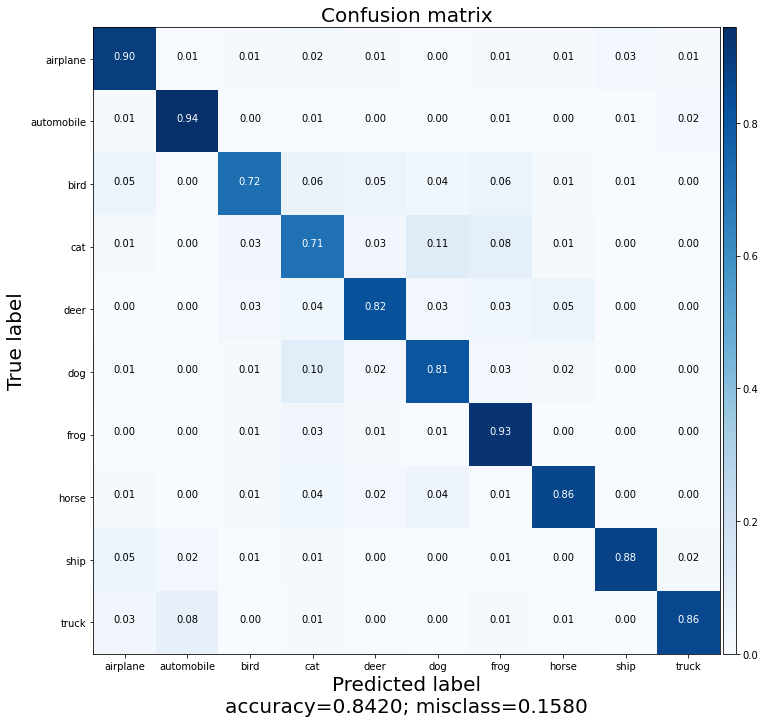

In [ ]:
cMap= 'Blues'
pngName = 'model_chapter3_'+cMap+'_confusion_matrix.png'

plot_confusion_matrix(cm, target_names=labels, cmap=cMap, normalize=True, labels=True, png_output=modelDIR, pngname=pngName, title='Confusion matrix',fontsize=10, figsize=10)